# Proteins with 2 repeats clustering and analysis

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn.metrics
from sklearn.cluster import KMeans, k_means
# from sklearn import preprocessingxx 
from sklearn.manifold import TSNE
%matplotlib inline

# from sklearn.preprocessing import MaxAbsScaler
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.figsize':(10,3)})

### Data pocessing

In [4]:
data = pd.read_csv('/Users/mlkndt/Downloads/data.csv')
data = data.drop('cluster', axis = 'columns')
data.head(5)

,pdbID,start1,end1,start2,end2,mean.length,linker.length,ChainLength,repeat_cover,secondary.structure,CATH.codes,PfamFamily,PfamCL,Pfam2ratio,CE.Symm,CE.Symm_repeat,couple.count,symmetry,total_symmetry,swapping
0,3hef.A,31,64,65,98,34.0,0,123,0.552846,Mainly Alpha,1.10.10.60,-,0,NaN,C1,C1,14,C2,C2,0
1,1yg2.A,75,119,120,164,45.0,0,169,0.532544,Mainly Alpha,1.10.10.10;6.10.140.190,Vir_act_alpha_C,123,0.0,C1,C1,90,C2,C2,0
2,2p9x.A,2,34,41,72,32.5,6,98,0.724490,Mainly Alpha,1.10.1200.200,NitrOD5,0,0.0,C2,C2,78,C2,C2,0
3,4gr2.A,11,47,48,84,37.0,0,110,0.672727,Mainly Alpha,1.10.1200.210,RbcX,0,0.0,C1,C1,58,C2,C2,0
4,1u9p.A,18,54,58,94,37.0,3,96,0.802083,Mainly Alpha,1.10.1220.10,Arc,57,0.0,C2,C2,88,C2,C2,0


In [5]:
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature pdbID :1198
The number of values for feature start1 :257
The number of values for feature end1 :357
The number of values for feature start2 :357
The number of values for feature end2 :442
The number of values for feature mean.length :354
The number of values for feature linker.length :46
The number of values for feature ChainLength :530
The number of values for feature repeat_cover :1080
The number of values for feature secondary.structure :4 -- ['Alpha Beta' 'Few Secondary Structures' 'Mainly Alpha' 'Mainly Beta']
The number of values for feature CATH.codes :770
The number of values for feature PfamFamily :937
The number of values for feature PfamCL :287
The number of values for feature Pfam2ratio :347
The number of values for feature CE.Symm :4 -- ['C1' 'C2' 'D2' 'R']
The number of values for feature CE.Symm_repeat :6 -- ['C1' 'C2' 'C3' 'D2' 'H' 'R']
The number of values for feature couple.count :390
The number of values for feature symmetry :2 -- ['C

In [6]:
data['CAT'] = 0
for i in range(len(data['CATH.codes'])):
        cat = []
        codes = data['CATH.codes'][i].split(';')
        for c in codes:
            cat.append('.'.join(c.split('.')[:-1]))
        data.iloc[i, -1] = ';'.join(cat)
data.head()

,pdbID,start1,end1,start2,end2,mean.length,linker.length,ChainLength,repeat_cover,secondary.structure,...,PfamFamily,PfamCL,Pfam2ratio,CE.Symm,CE.Symm_repeat,couple.count,symmetry,total_symmetry,swapping,CAT
0,3hef.A,31,64,65,98,34.0,0,123,0.552846,Mainly Alpha,...,-,0,NaN,C1,C1,14,C2,C2,0,1.10.10
1,1yg2.A,75,119,120,164,45.0,0,169,0.532544,Mainly Alpha,...,Vir_act_alpha_C,123,0.0,C1,C1,90,C2,C2,0,1.10.10;6.10.140
2,2p9x.A,2,34,41,72,32.5,6,98,0.724490,Mainly Alpha,...,NitrOD5,0,0.0,C2,C2,78,C2,C2,0,1.10.1200
3,4gr2.A,11,47,48,84,37.0,0,110,0.672727,Mainly Alpha,...,RbcX,0,0.0,C1,C1,58,C2,C2,0,1.10.1200
4,1u9p.A,18,54,58,94,37.0,3,96,0.802083,Mainly Alpha,...,Arc,57,0.0,C2,C2,88,C2,C2,0,1.10.1220


### Making some features categorical 

<Axes: xlabel='mean.length', ylabel='Count'>

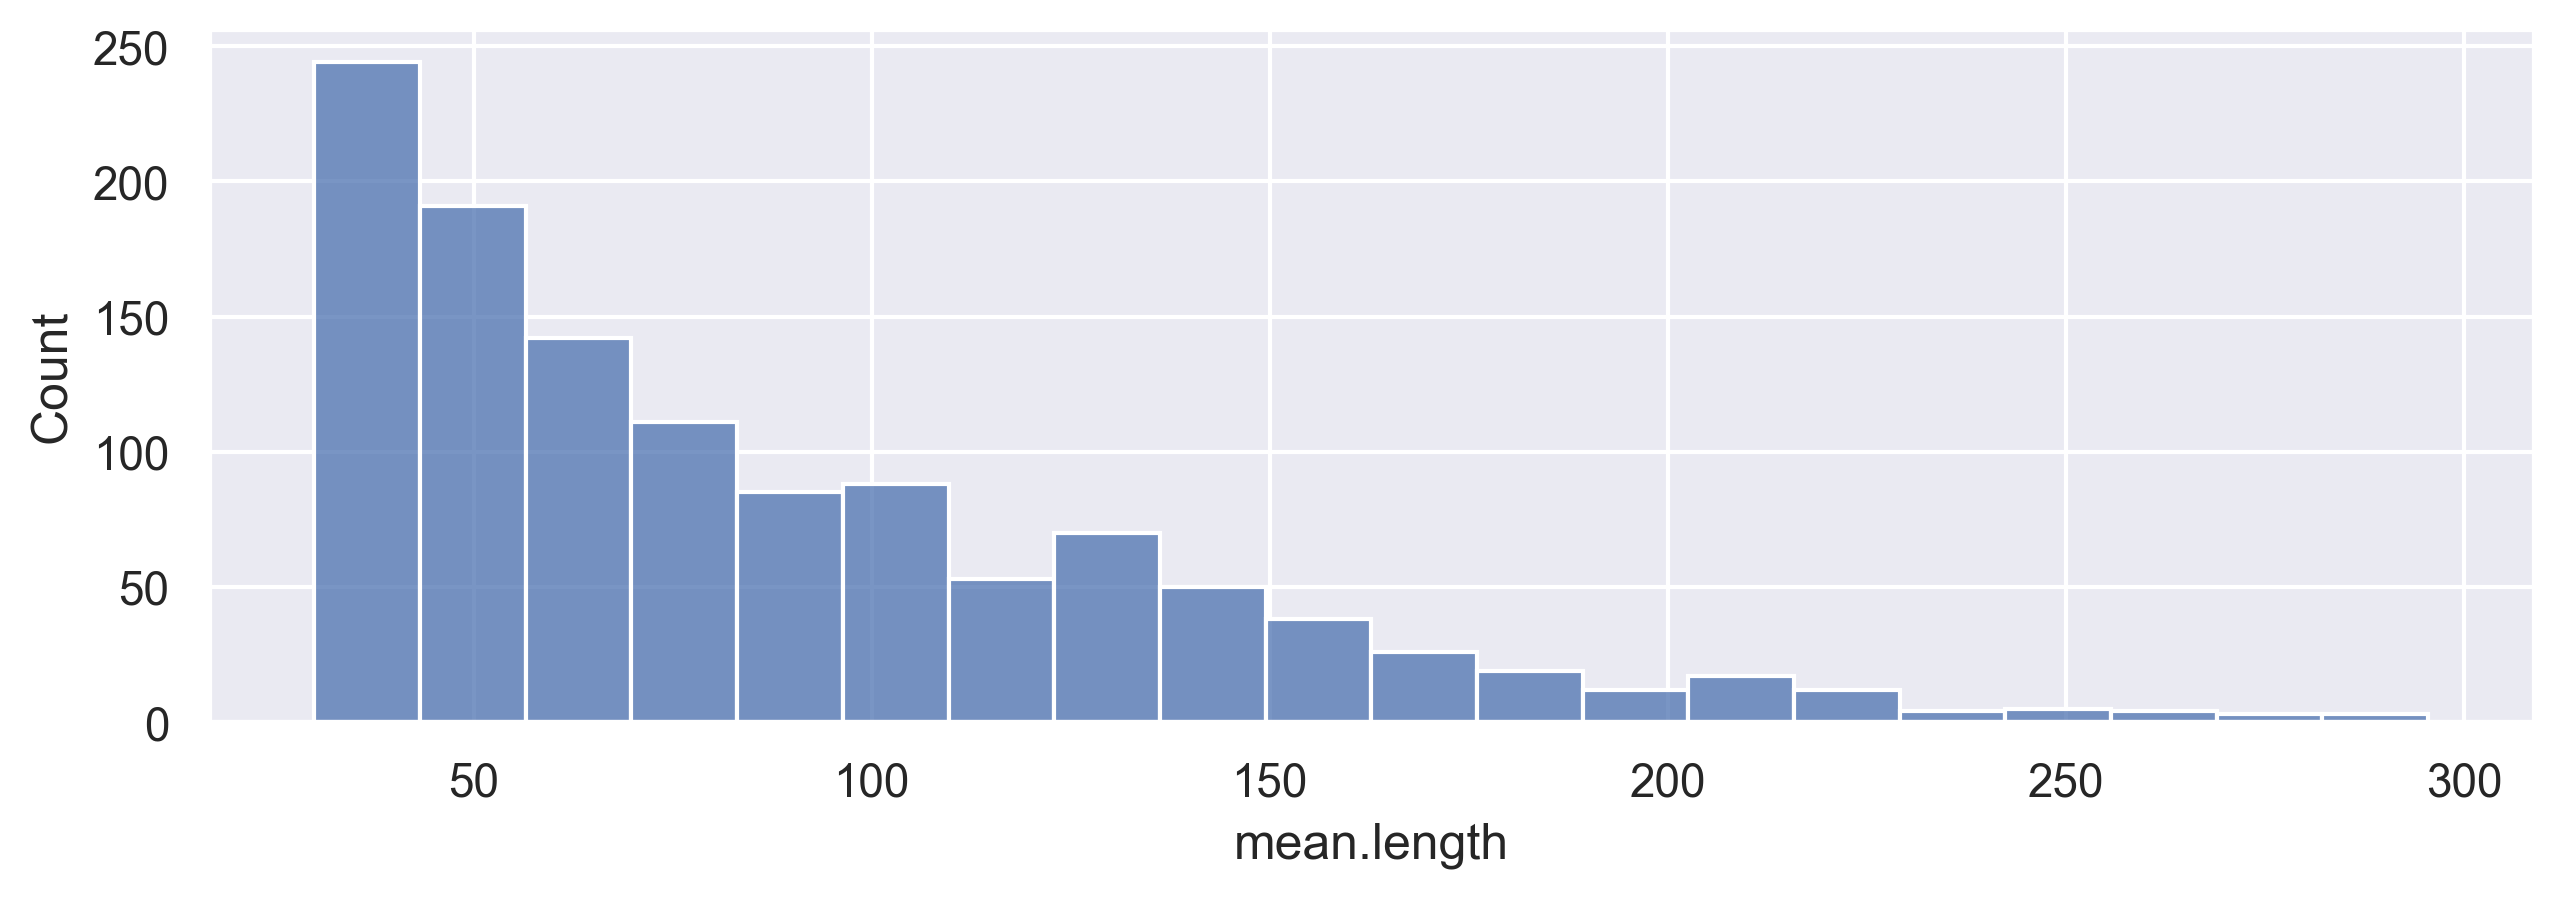

In [7]:
sns.histplot(data = data[data['mean.length'] < 300], x = 'mean.length')

In [8]:
data['mean.length_srt'] = pd.cut(data['mean.length'], bins = [0, 45, 60, 90, 120, 200, 300, 500])
data['repeat_cover_srt'] = pd.cut(data['repeat_cover'], bins = [0, 0.5, 0.9, 1])

In [9]:
pd.set_option('display.max_columns', 500)
data.head()

,pdbID,start1,end1,start2,end2,mean.length,linker.length,ChainLength,repeat_cover,secondary.structure,CATH.codes,PfamFamily,PfamCL,Pfam2ratio,CE.Symm,CE.Symm_repeat,couple.count,symmetry,total_symmetry,swapping,CAT,mean.length_srt,repeat_cover_srt
0,3hef.A,31,64,65,98,34.0,0,123,0.552846,Mainly Alpha,1.10.10.60,-,0,NaN,C1,C1,14,C2,C2,0,1.10.10,"(0, 45]","(0.5, 0.9]"
1,1yg2.A,75,119,120,164,45.0,0,169,0.532544,Mainly Alpha,1.10.10.10;6.10.140.190,Vir_act_alpha_C,123,0.0,C1,C1,90,C2,C2,0,1.10.10;6.10.140,"(0, 45]","(0.5, 0.9]"
2,2p9x.A,2,34,41,72,32.5,6,98,0.724490,Mainly Alpha,1.10.1200.200,NitrOD5,0,0.0,C2,C2,78,C2,C2,0,1.10.1200,"(0, 45]","(0.5, 0.9]"
3,4gr2.A,11,47,48,84,37.0,0,110,0.672727,Mainly Alpha,1.10.1200.210,RbcX,0,0.0,C1,C1,58,C2,C2,0,1.10.1200,"(0, 45]","(0.5, 0.9]"
4,1u9p.A,18,54,58,94,37.0,3,96,0.802083,Mainly Alpha,1.10.1220.10,Arc,57,0.0,C2,C2,88,C2,C2,0,1.10.1220,"(0, 45]","(0.5, 0.9]"


### Final statistics:

In [10]:
data['total_symmetry'].value_counts()

total_symmetry
C2      831
else    367
Name: count, dtype: int64

In [11]:
data['size'] = np.where(data['mean.length'] > 55, 1, 0)

<Axes: xlabel='mean.length', ylabel='Count'>

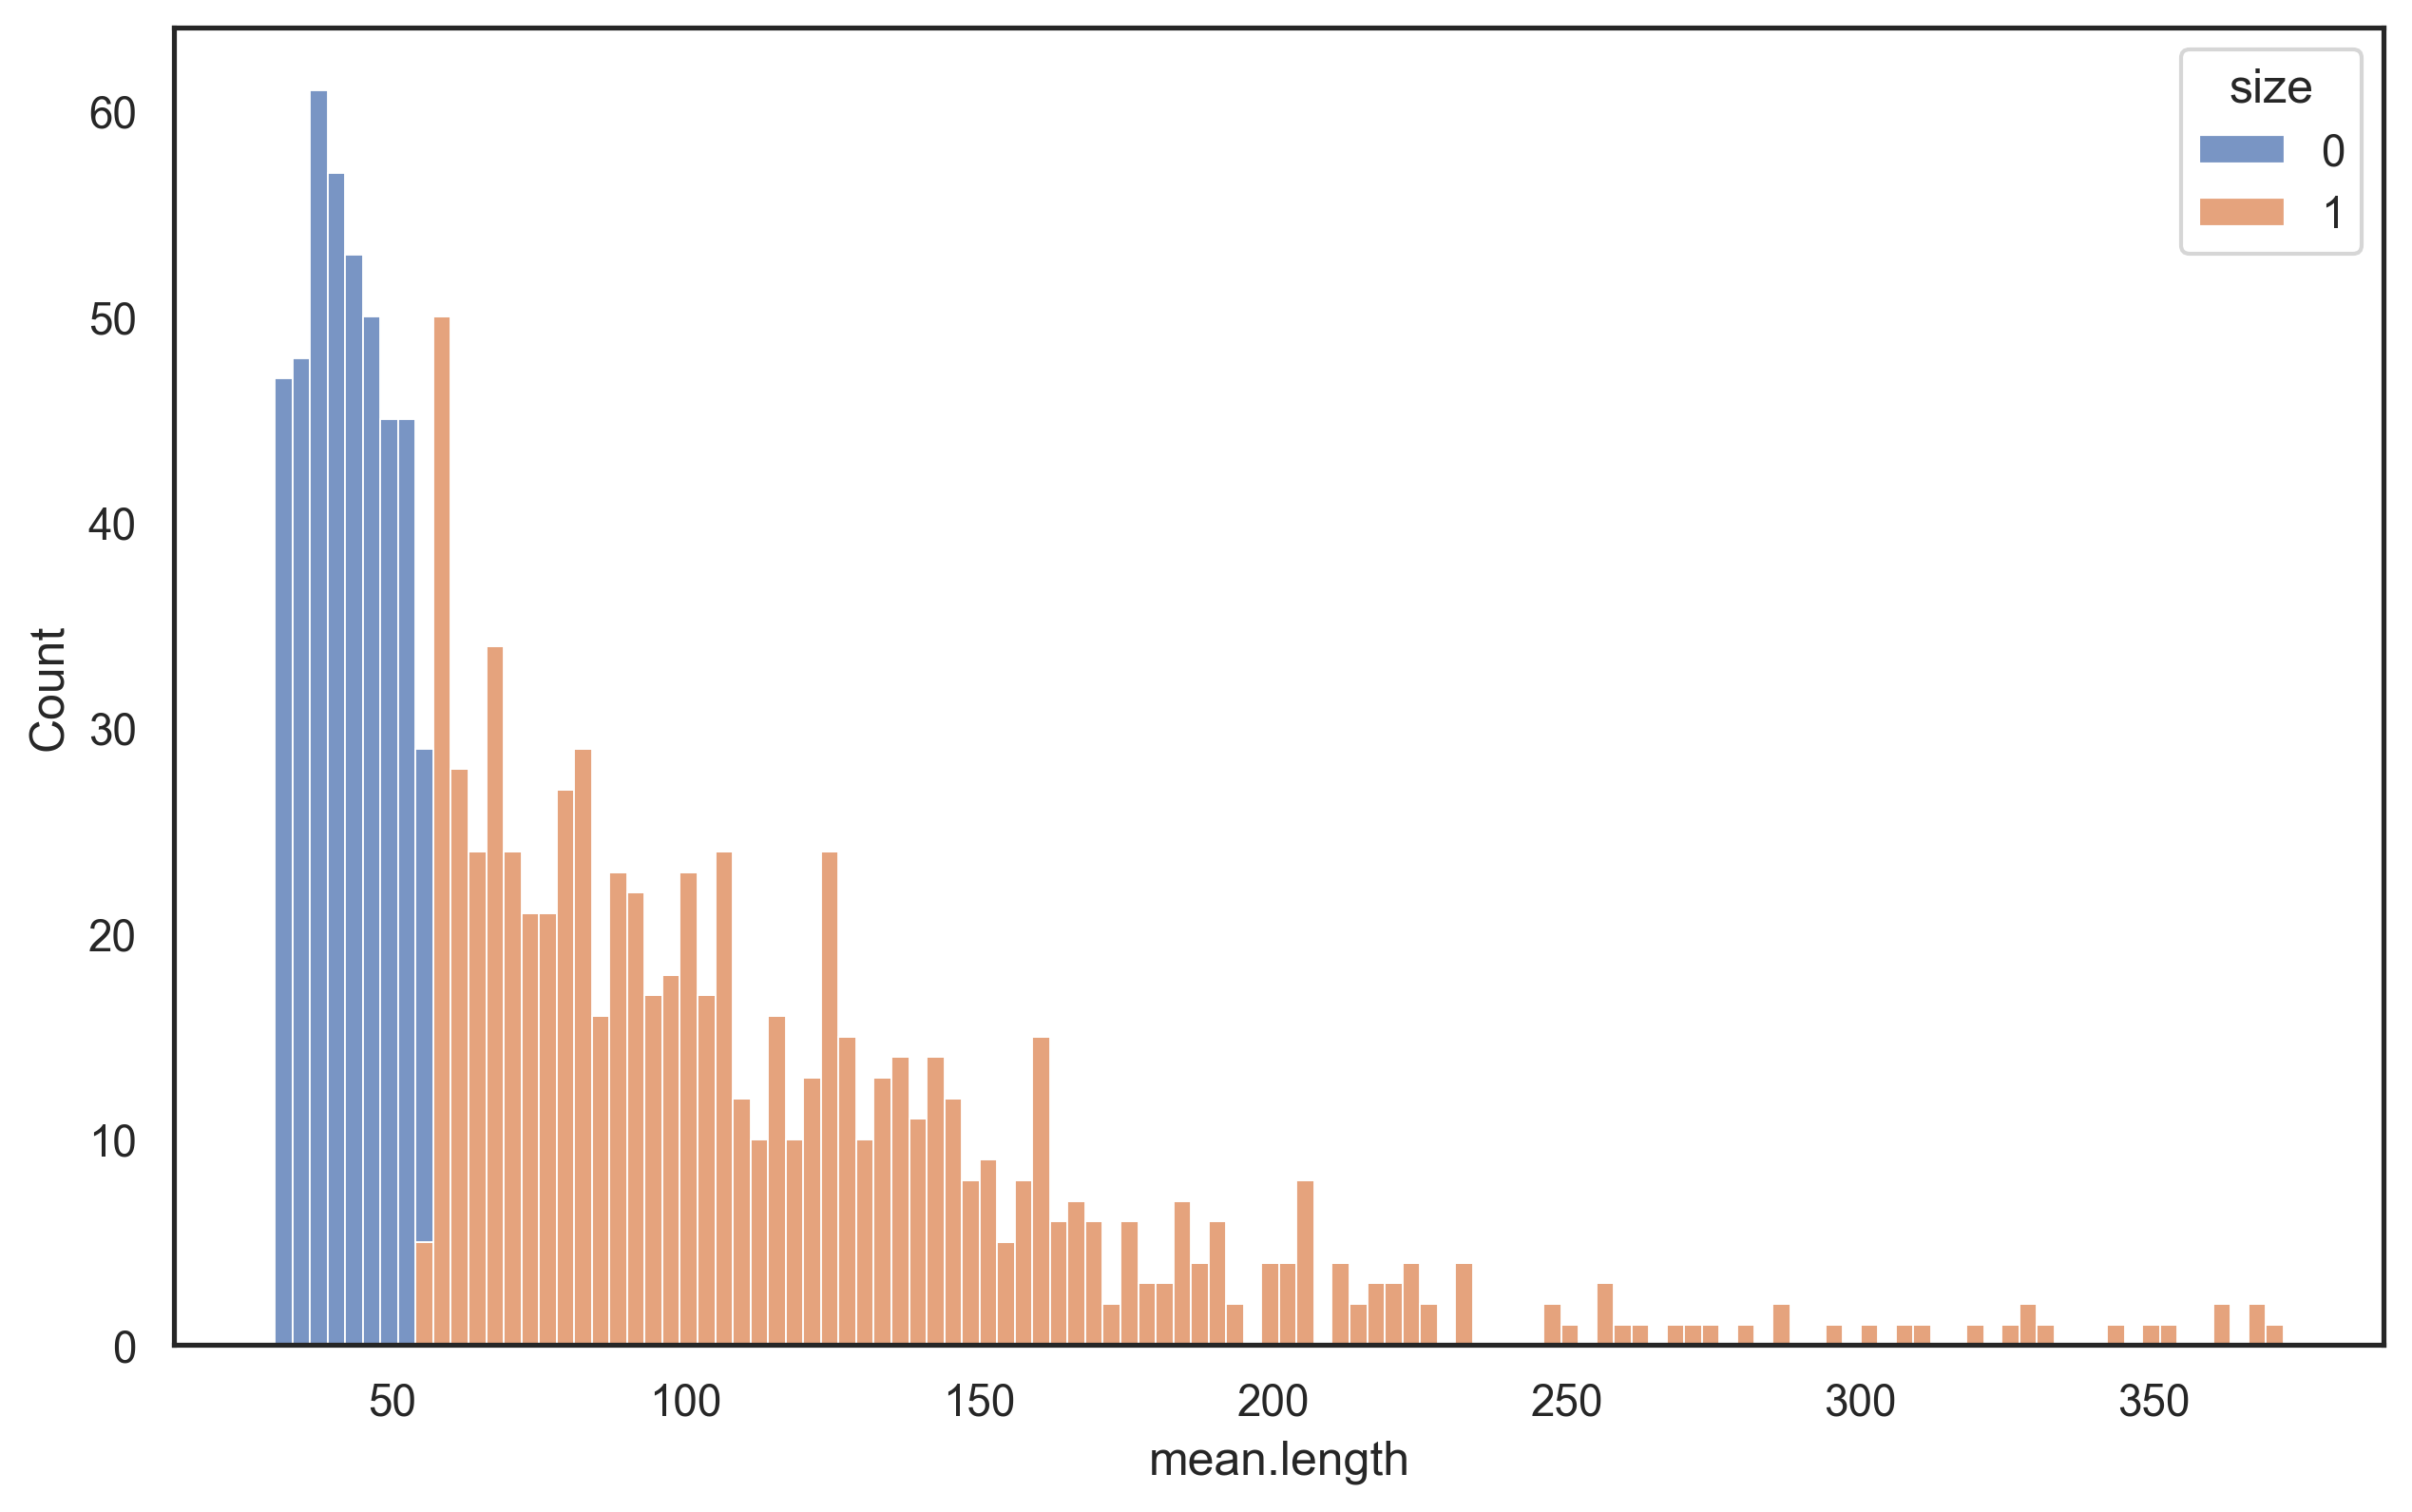

In [12]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("white")
sns.histplot(data[data['mean.length'] < 400], x = 'mean.length', multiple="stack", hue = 'size', binwidth = 3)

<Axes: xlabel='mean.length', ylabel='secondary.structure'>

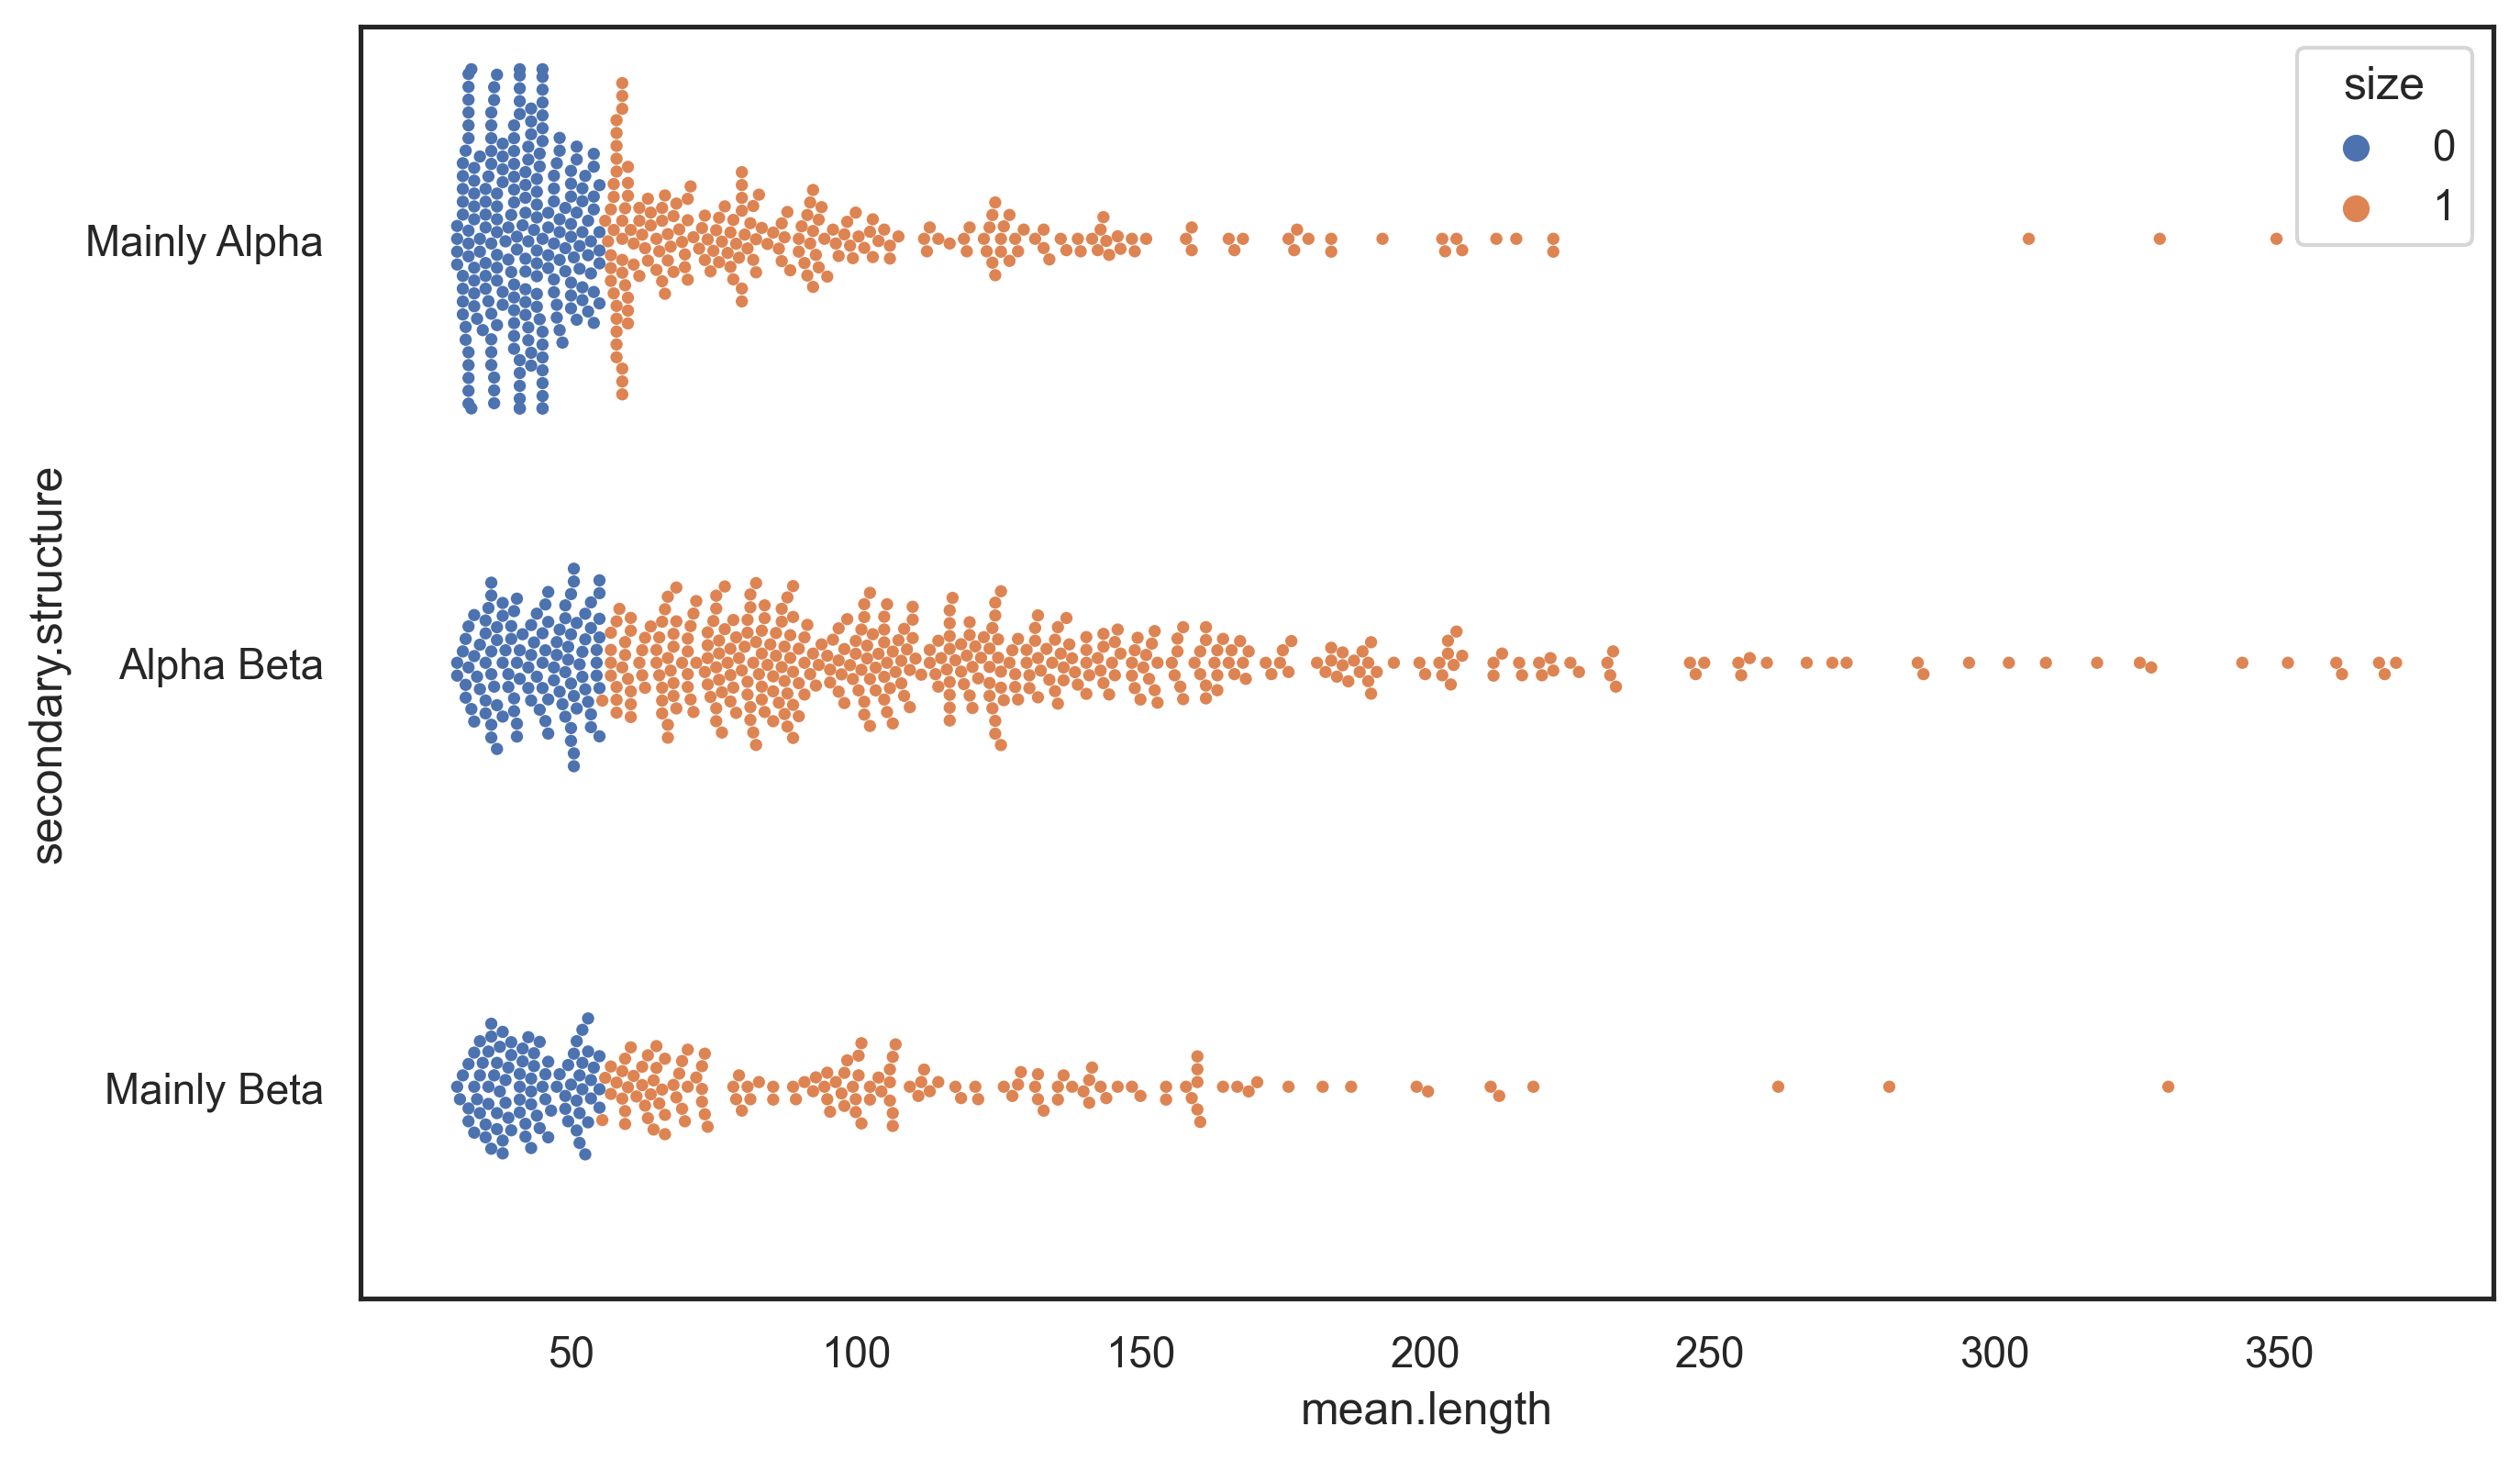

In [13]:
sns.swarmplot(data=data[(data["secondary.structure"] != 'Few Secondary Structures') & (data['mean.length'] < 400)], x="mean.length", y="secondary.structure", hue = 'size',  size = 3.2,  dodge=False)

## Clustering via k-means

In [14]:
features = ['mean.length_srt', 'total_symmetry','secondary.structure', 'swapping',  'repeat_cover_srt',  'CAT']

In [15]:
data_small = data[data['mean.length'] <= 55]
data_big = data[data['mean.length'] > 55]

In [17]:
data_small_final = data_small[features]
data_small_final = pd.get_dummies(data_small_final)
print(data_small_final.shape)

data_big_final = data_big[features]
data_big_final = pd.get_dummies(data_big_final)
print(data_big_final.shape)

(430, 213)
(768, 363)


# K-means clustering for small proteins

In [69]:
X_train = data_small_final.values

In [27]:
no_of_clusters = range(3,150) 
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print(f, u)


3 1051.7111082374236
4 961.0638383650432
5 907.8192499777537
6 862.6508029417971
7 804.3448638039076
8 771.8368485006881
9 747.7435952088331
10 719.0771079215472
11 691.3140856039414
12 662.6100234576843
13 661.3540888313792
14 640.8425140745632
15 610.5066922622893
16 588.2320769622551
17 577.4723538532833
18 566.5265041209061
19 561.2656063805565
20 550.1435964686706
21 527.1867087657303
22 509.8675214981762
23 507.37470852494243
24 491.71002800750233
25 479.42153095352114
26 472.0642073678736
27 475.29301373177793
28 463.4704840976798
29 456.37197447998864
30 451.50166290037015
31 438.3362429602105
32 429.72247699353534
33 426.7801931212422
34 428.19480315008695
35 418.10394949043217
36 410.3863963908947
37 408.62137789342654
38 405.19993079170035
39 398.60538822126756
40 383.67843557743504
41 386.2282952835278
42 383.9521394003716
43 374.45710079518597
44 378.5134585058554
45 373.9249353739349
46 368.6116056492527
47 365.4136250844459
48 362.55273199023196
49 354.97227630594534
50 

[Text(0.5, 0, 'Number if clusters'), Text(0, 0.5, 'Inertia')]

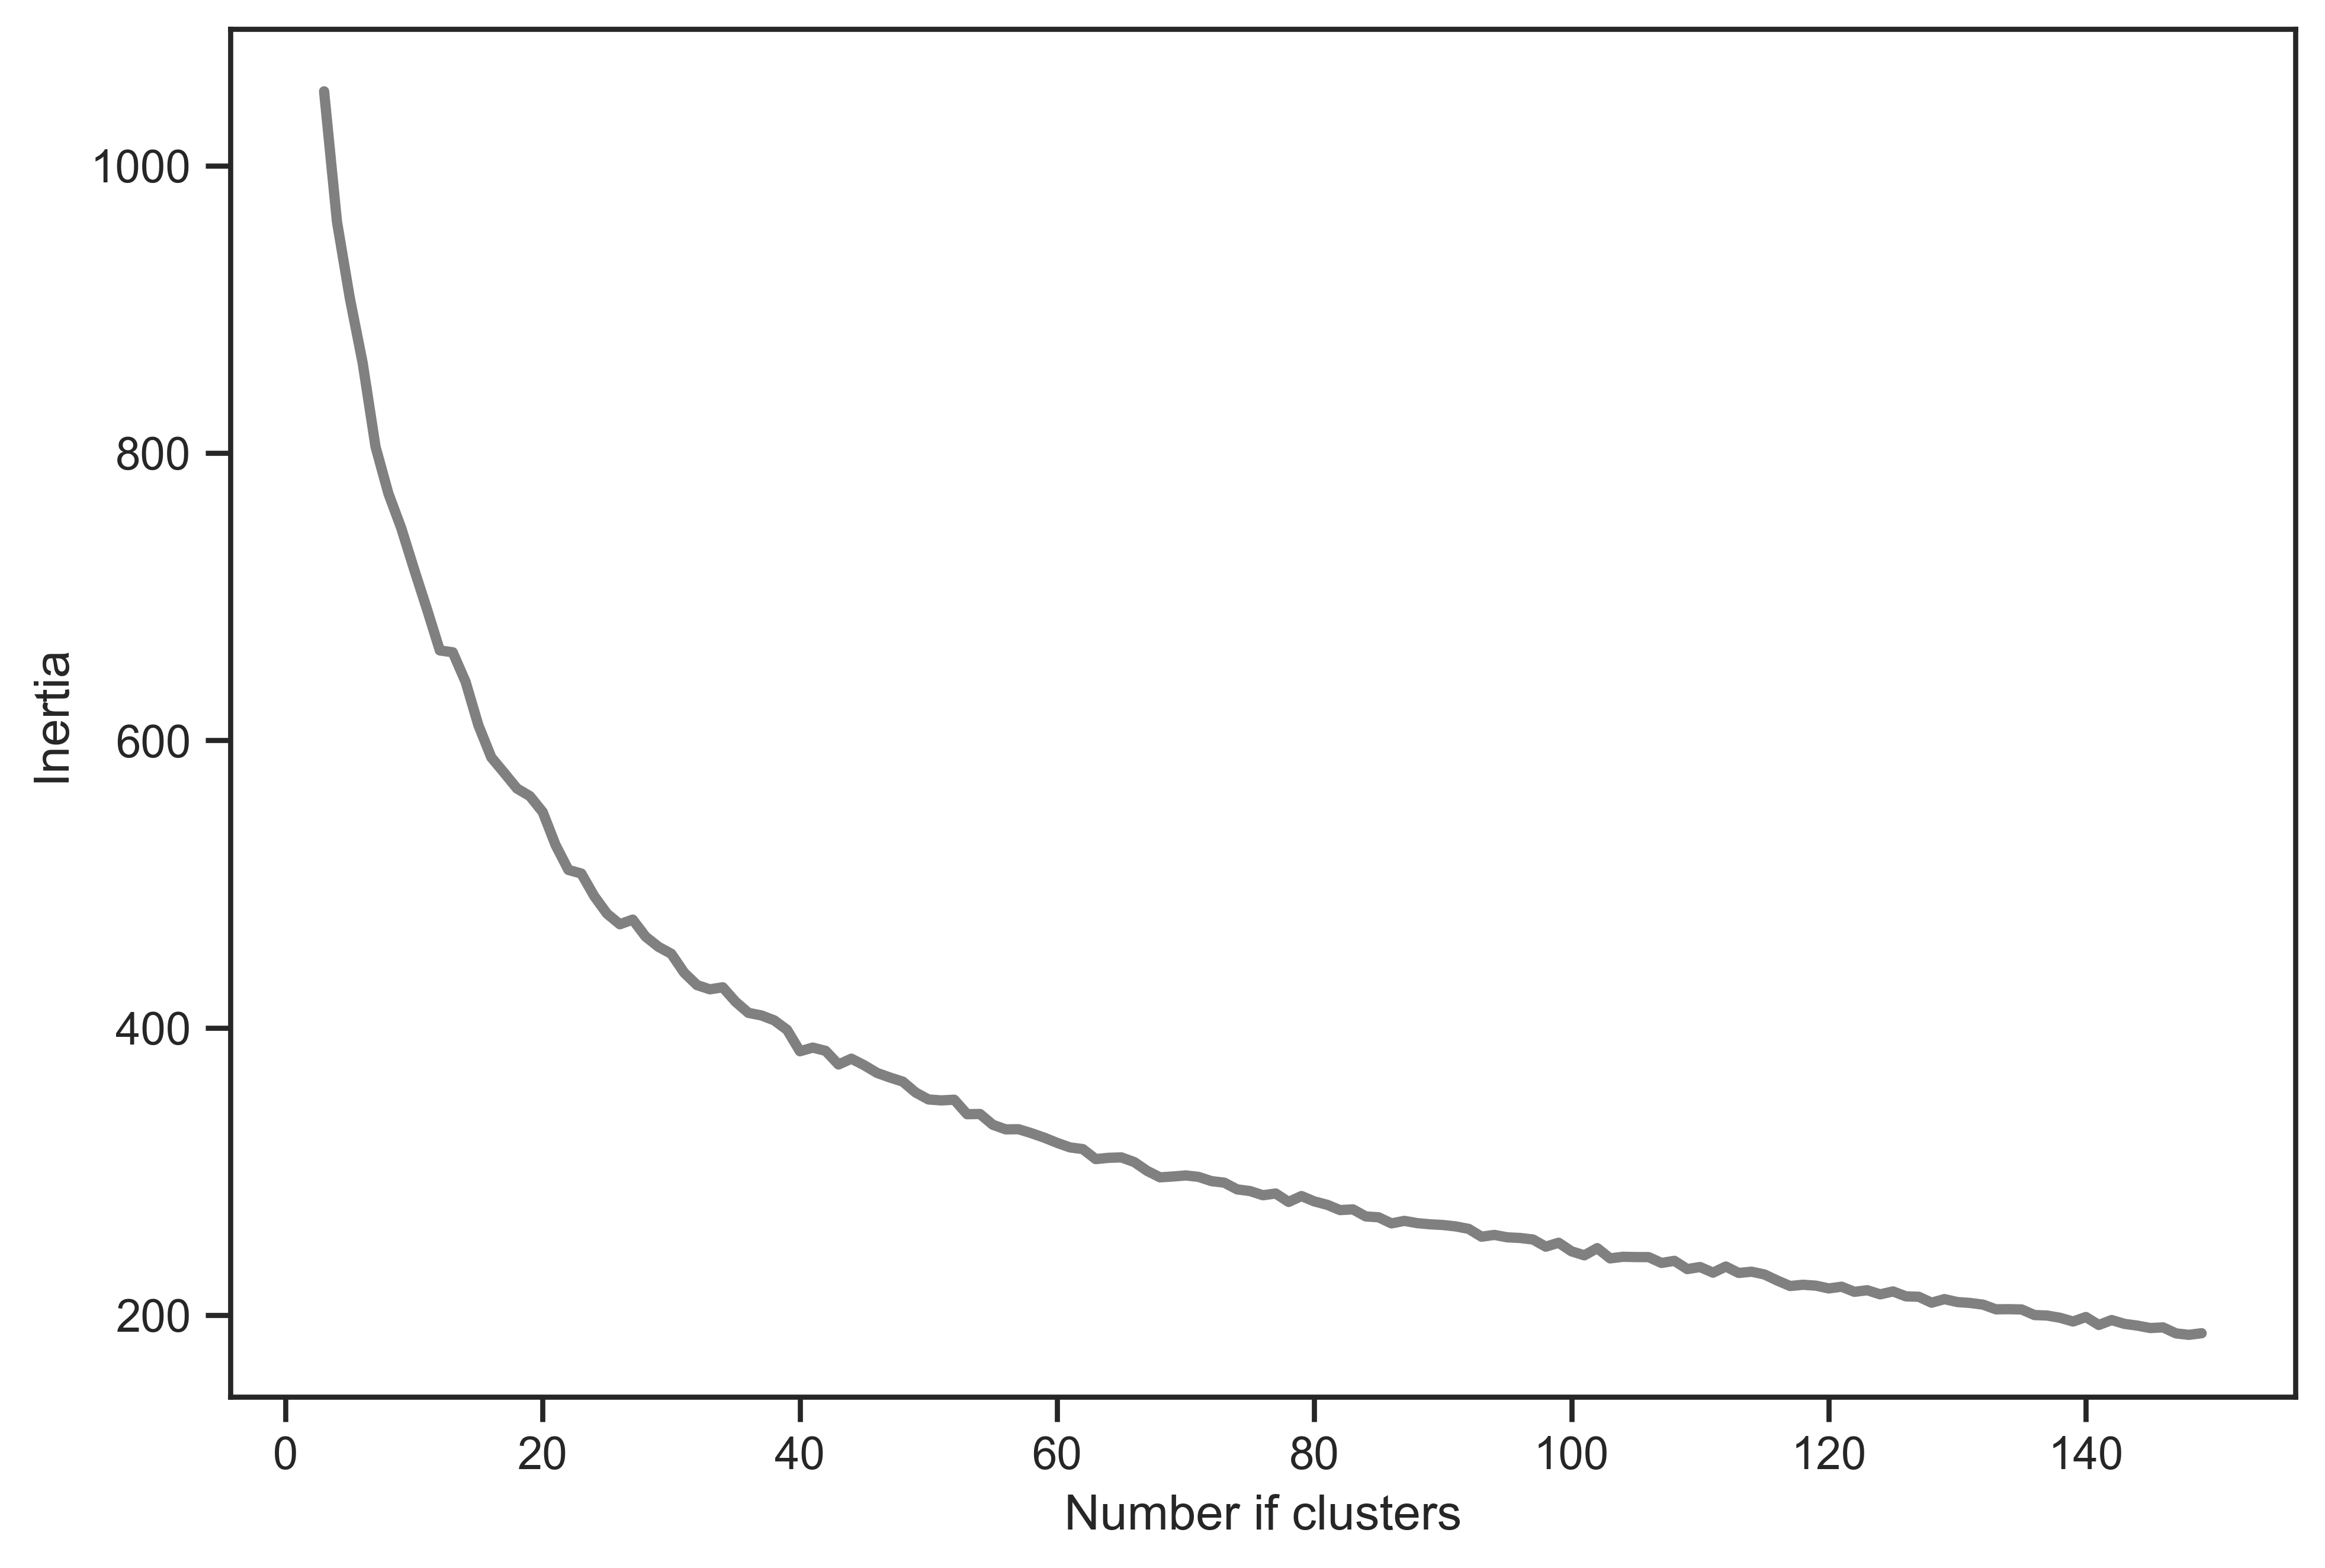

In [28]:
sns.set_theme(style="ticks")
fig, (ax1) = plt.subplots(1, figsize=(9,6))
p = sns.lineplot(x = no_of_clusters, y = inertia, linewidth=2.5, color = 'grey')
p.set(xlabel='Number if clusters', ylabel='Inertia')

In [70]:
kmeans = KMeans(n_clusters=40, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

predictions_small = kmeans.predict(X_train)
predictions_small.shape

(431,)

In [71]:
data_small.loc[:, ('cluster')] = predictions_small
data_small.head()

/var/folders/hg/9sll2zd171bd_4lsq8nyjq6h0000gn/T/ipykernel_947/941775883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_small.loc[:, ('cluster')] = predictions_small


,pdbID,start1,end1,start2,end2,mean.length,linker.length,CE.Symm,ChainLength,repeat_cover,...,couple.count,symmetry,swapping,CE.Symm_repeat,CAT,mean.length_srt,repeat_cover_srt,compare,total_symmetry,cluster
0,1a0p.A,0,39,46,78,36.5,6,C1,271,0.291513,...,77,C2,0,C2,1.10.150,"(0, 45]","(0.0, 0.5]",C2 old,C2,1
1,1a4s.A,64,96,97,129,33.0,0,C1,503,0.131213,...,12,C2,0,C1,3.40.605,"(0, 45]","(0.0, 0.5]",C2 new,C2,1
2,1a75.B,26,66,67,107,41.0,0,C1,108,0.759259,...,187,C2,0,C2,1.10.238,"(0, 45]","(0.5, 0.9]",C2 old,C2,0
3,1a7d.A,8,62,63,117,55.0,0,C1,118,0.932203,...,45,C2,1,D2,1.20.120,"(45, 60]","(0.9, 1.0]",C2 new,C2,14
5,1a87.A,196,237,238,279,42.0,0,C1,297,0.282828,...,2,C2,0,C1,1.10.490,"(0, 45]","(0.0, 0.5]",C2 new,C2,1


# K-means clustering for big proteins

In [73]:
X_train = data_big_final.values

In [38]:
no_of_clusters = range(3,200) 
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 3 Clusters is: 2253.6266962280224
The innertia for : 4 Clusters is: 2144.0585280486675
The innertia for : 5 Clusters is: 2034.669409681132
The innertia for : 6 Clusters is: 1924.4073844920556
The innertia for : 7 Clusters is: 1854.9503072802772
The innertia for : 8 Clusters is: 1796.513019885744
The innertia for : 9 Clusters is: 1728.0749989721267
The innertia for : 10 Clusters is: 1689.583236073913
The innertia for : 11 Clusters is: 1666.6228133631926
The innertia for : 12 Clusters is: 1625.2603828898086
The innertia for : 13 Clusters is: 1566.8686234123948
The innertia for : 14 Clusters is: 1553.6497830795674
The innertia for : 15 Clusters is: 1505.1784130762478
The innertia for : 16 Clusters is: 1497.941220054485
The innertia for : 17 Clusters is: 1475.1689721151188
The innertia for : 18 Clusters is: 1443.4498777278866
The innertia for : 19 Clusters is: 1419.3816929377117
The innertia for : 20 Clusters is: 1372.5811488704876
The innertia for : 21 Clusters is: 1346

The innertia for : 157 Clusters is: 522.2480544601594
The innertia for : 158 Clusters is: 525.5853843868549
The innertia for : 159 Clusters is: 523.9187177201882
The innertia for : 160 Clusters is: 522.307606609077
The innertia for : 161 Clusters is: 515.3121875175418
The innertia for : 162 Clusters is: 513.9819957819957
The innertia for : 163 Clusters is: 512.6611114006763
The innertia for : 164 Clusters is: 511.1059225264944
The innertia for : 165 Clusters is: 512.9742732757437
The innertia for : 166 Clusters is: 504.93167639378146
The innertia for : 167 Clusters is: 505.6569699306539
The innertia for : 168 Clusters is: 502.32562823141745
The innertia for : 169 Clusters is: 501.6939650687474
The innertia for : 170 Clusters is: 499.99887645034687
The innertia for : 171 Clusters is: 494.15272260419306
The innertia for : 172 Clusters is: 493.94173359320405
The innertia for : 173 Clusters is: 492.2750669265374
The innertia for : 174 Clusters is: 487.0130169830169
The innertia for : 175 C

[Text(0.5, 0, 'Number if clusters'), Text(0, 0.5, 'Inertia')]

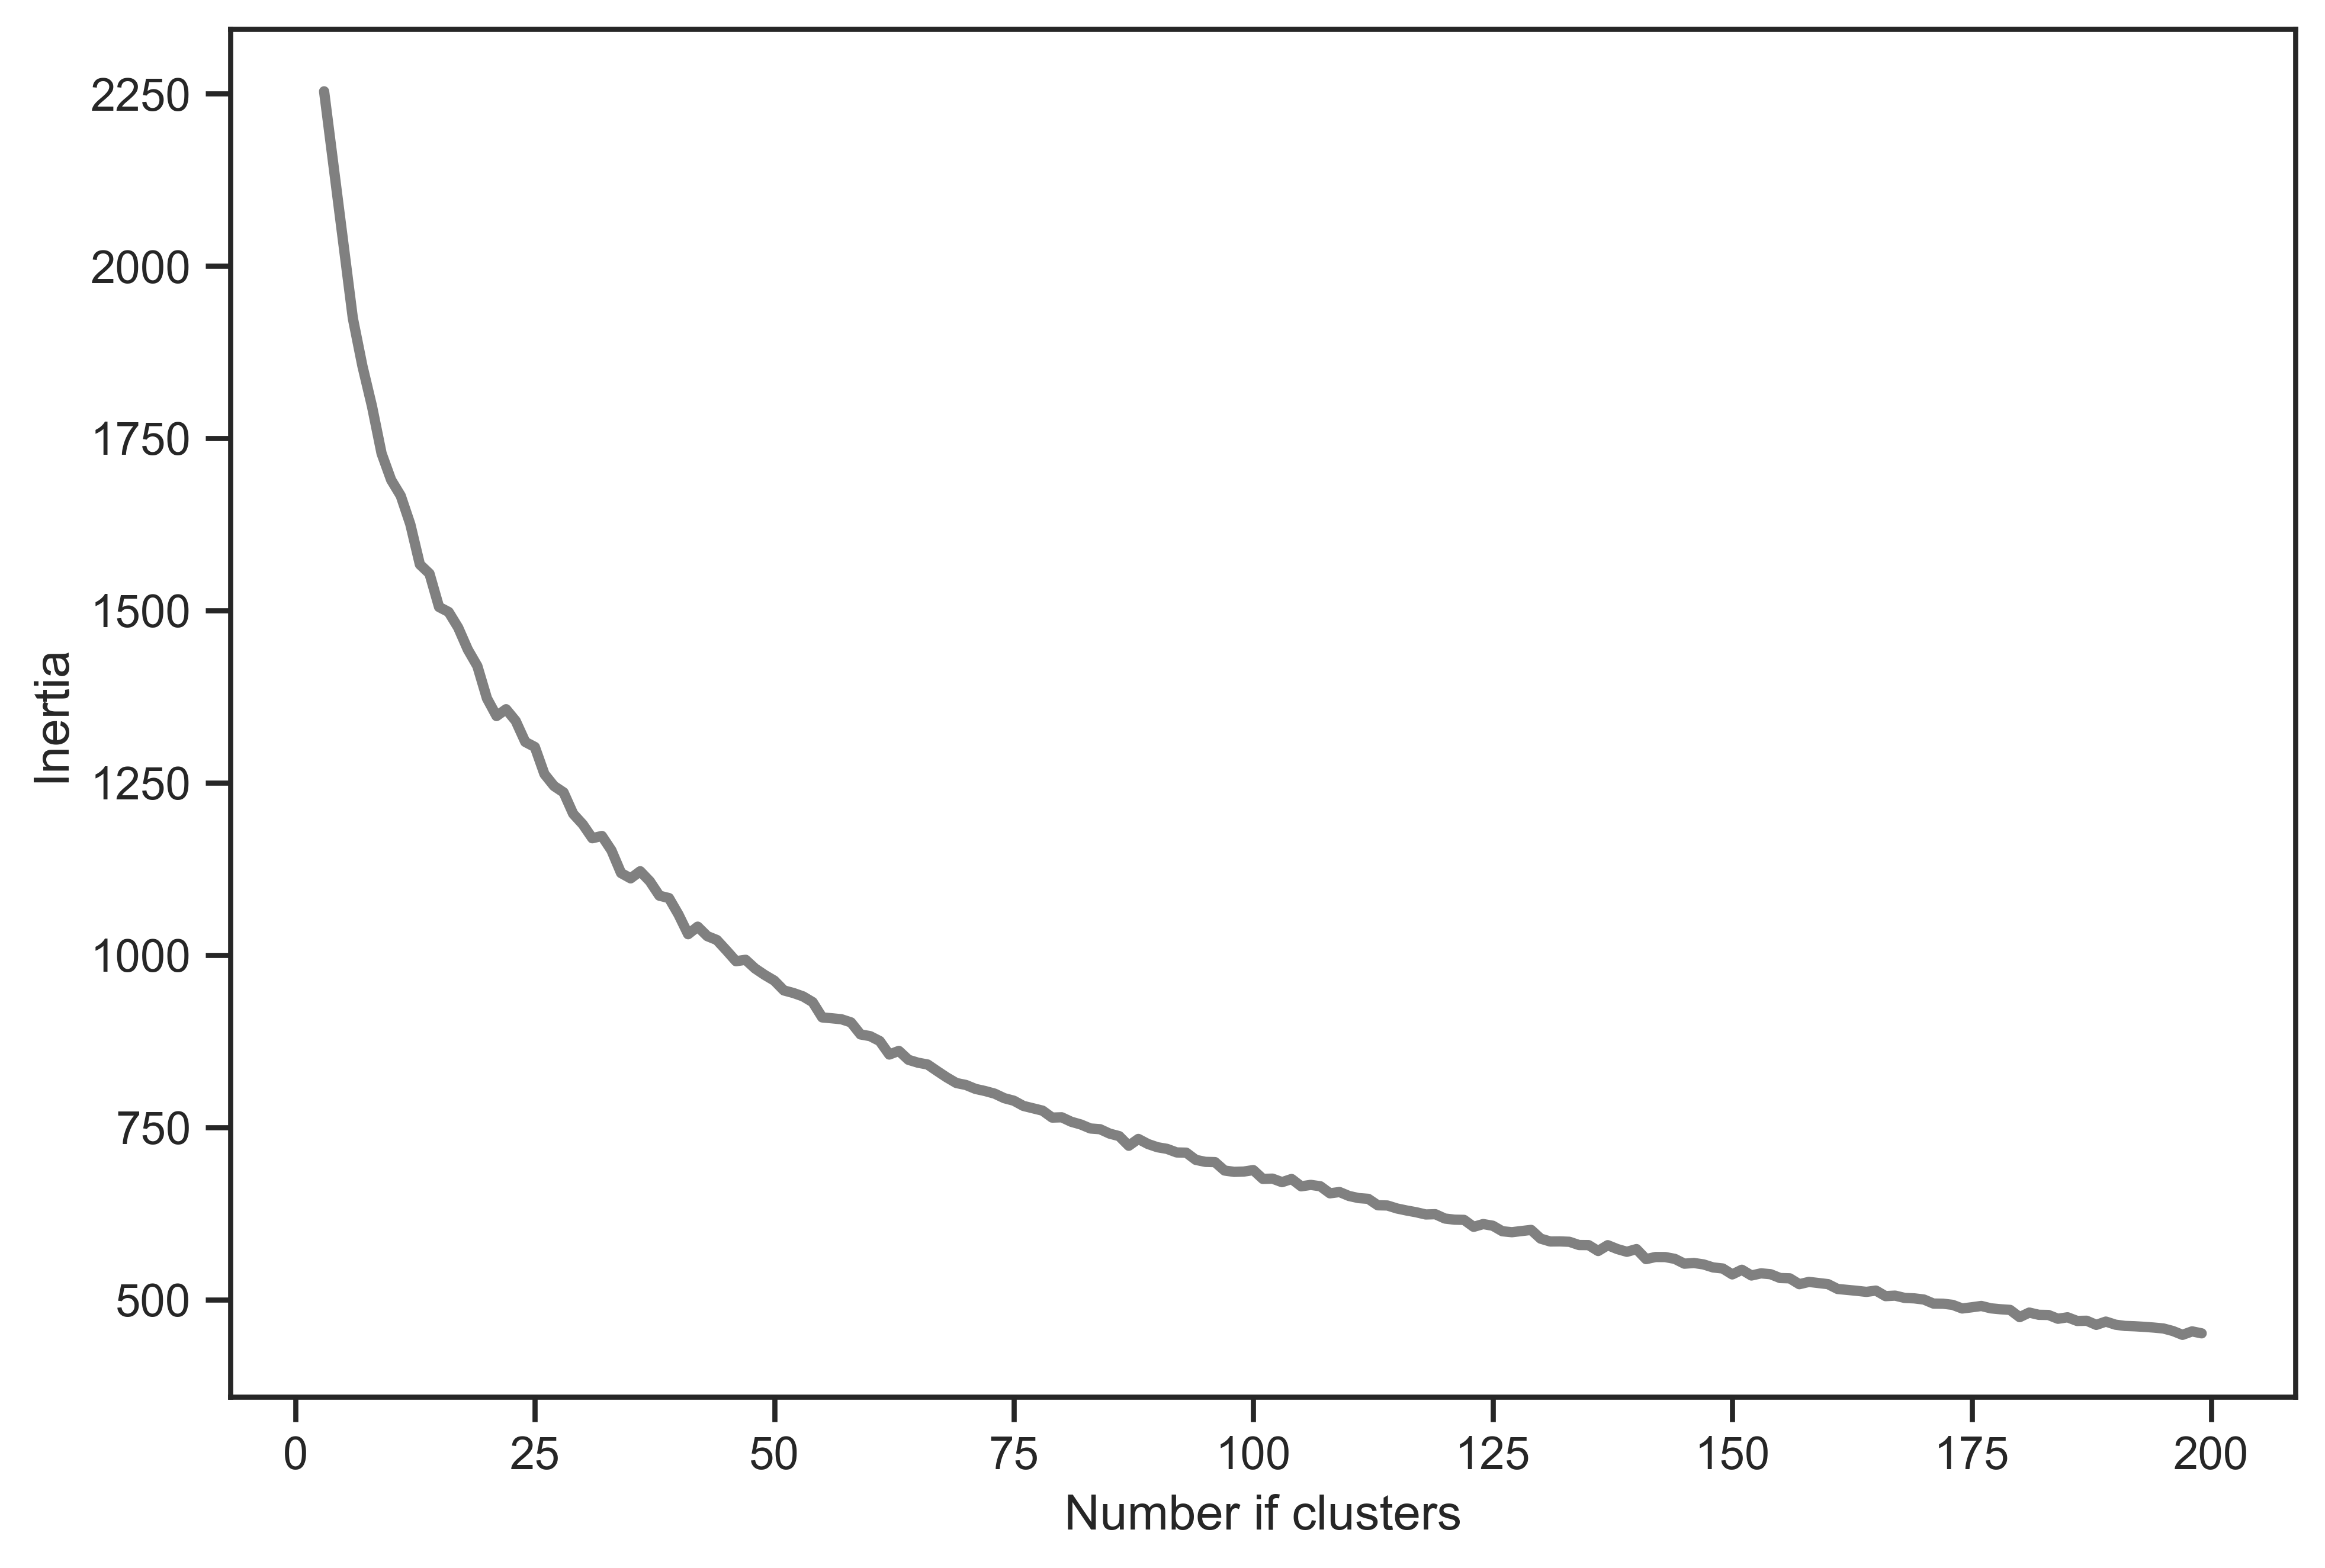

In [39]:
sns.set_theme(style="ticks")
fig, (ax1) = plt.subplots(1, figsize=(9,6))
p = sns.lineplot(x = no_of_clusters, y = inertia, linewidth=2.5, color = 'grey')
p.set(xlabel='Number if clusters', ylabel='Inertia')

In [74]:
kmeans = KMeans(n_clusters=60, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

predictions_big = kmeans.predict(X_train) + 40

In [77]:
data_big.loc[:, ('cluster')] = predictions_big
data_big

/var/folders/hg/9sll2zd171bd_4lsq8nyjq6h0000gn/T/ipykernel_947/752833606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_big.loc[:, ('cluster')] = predictions_big


,pdbID,start1,end1,start2,end2,mean.length,linker.length,CE.Symm,ChainLength,repeat_cover,...,couple.count,symmetry,swapping,CE.Symm_repeat,CAT,mean.length_srt,repeat_cover_srt,compare,total_symmetry,cluster
581,1a05.A,1,177,181,305,151.0,3,C2,357,0.854342,...,1489,C2,1,C2,3.40.718,"(120, 200]","(0.5, 0.9]",C2 old,C2,48
582,1a59.A,33,108,109,217,92.5,0,C2,377,0.490716,...,202,C2,1,C2,1.10.580,"(90, 120]","(0.0, 0.5]",C2 old,C2,90
583,1a5i.A,22,118,139,253,106.0,20,C1,265,0.875472,...,17,C2,0,C1,2.40.10,"(90, 120]","(0.5, 0.9]",C2 new,C2,41
585,1a6c.A,6,171,188,344,161.5,16,C1,513,0.660819,...,0,else,0,C1,2.60.120,"(120, 200]","(0.5, 0.9]",C1 old,else,60
586,1a6z.A,1,83,88,168,82.0,4,C2,272,0.617647,...,409,C2,0,C2,3.30.500,"(60, 90]","(0.5, 0.9]",C2 old,C2,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,7d90.A,371,489,490,566,98.0,0,C1,880,0.222727,...,56,C2,1,C1,,"(90, 120]","(0.0, 0.5]",C2 new,C2,79
1417,7jg5.d,165,271,272,356,96.0,0,C1,427,0.449649,...,0,else,0,C1,,"(90, 120]","(0.0, 0.5]",C1 old,else,81
1418,7js4.A,554,729,777,952,176.0,47,C1,953,0.418678,...,0,else,0,C1,,"(120, 200]","(0.0, 0.5]",C1 old,else,72
1419,7jsj.A,18,217,245,450,203.0,27,C2,468,0.925214,...,1217,C2,1,C2,,"(200, 300]","(0.9, 1.0]",C2 old,C2,58


# TSNE vizualisation 

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE()
xx = data[features]
X = pd.get_dummies(xx)
X_embedded = tsne.fit_transform(X)

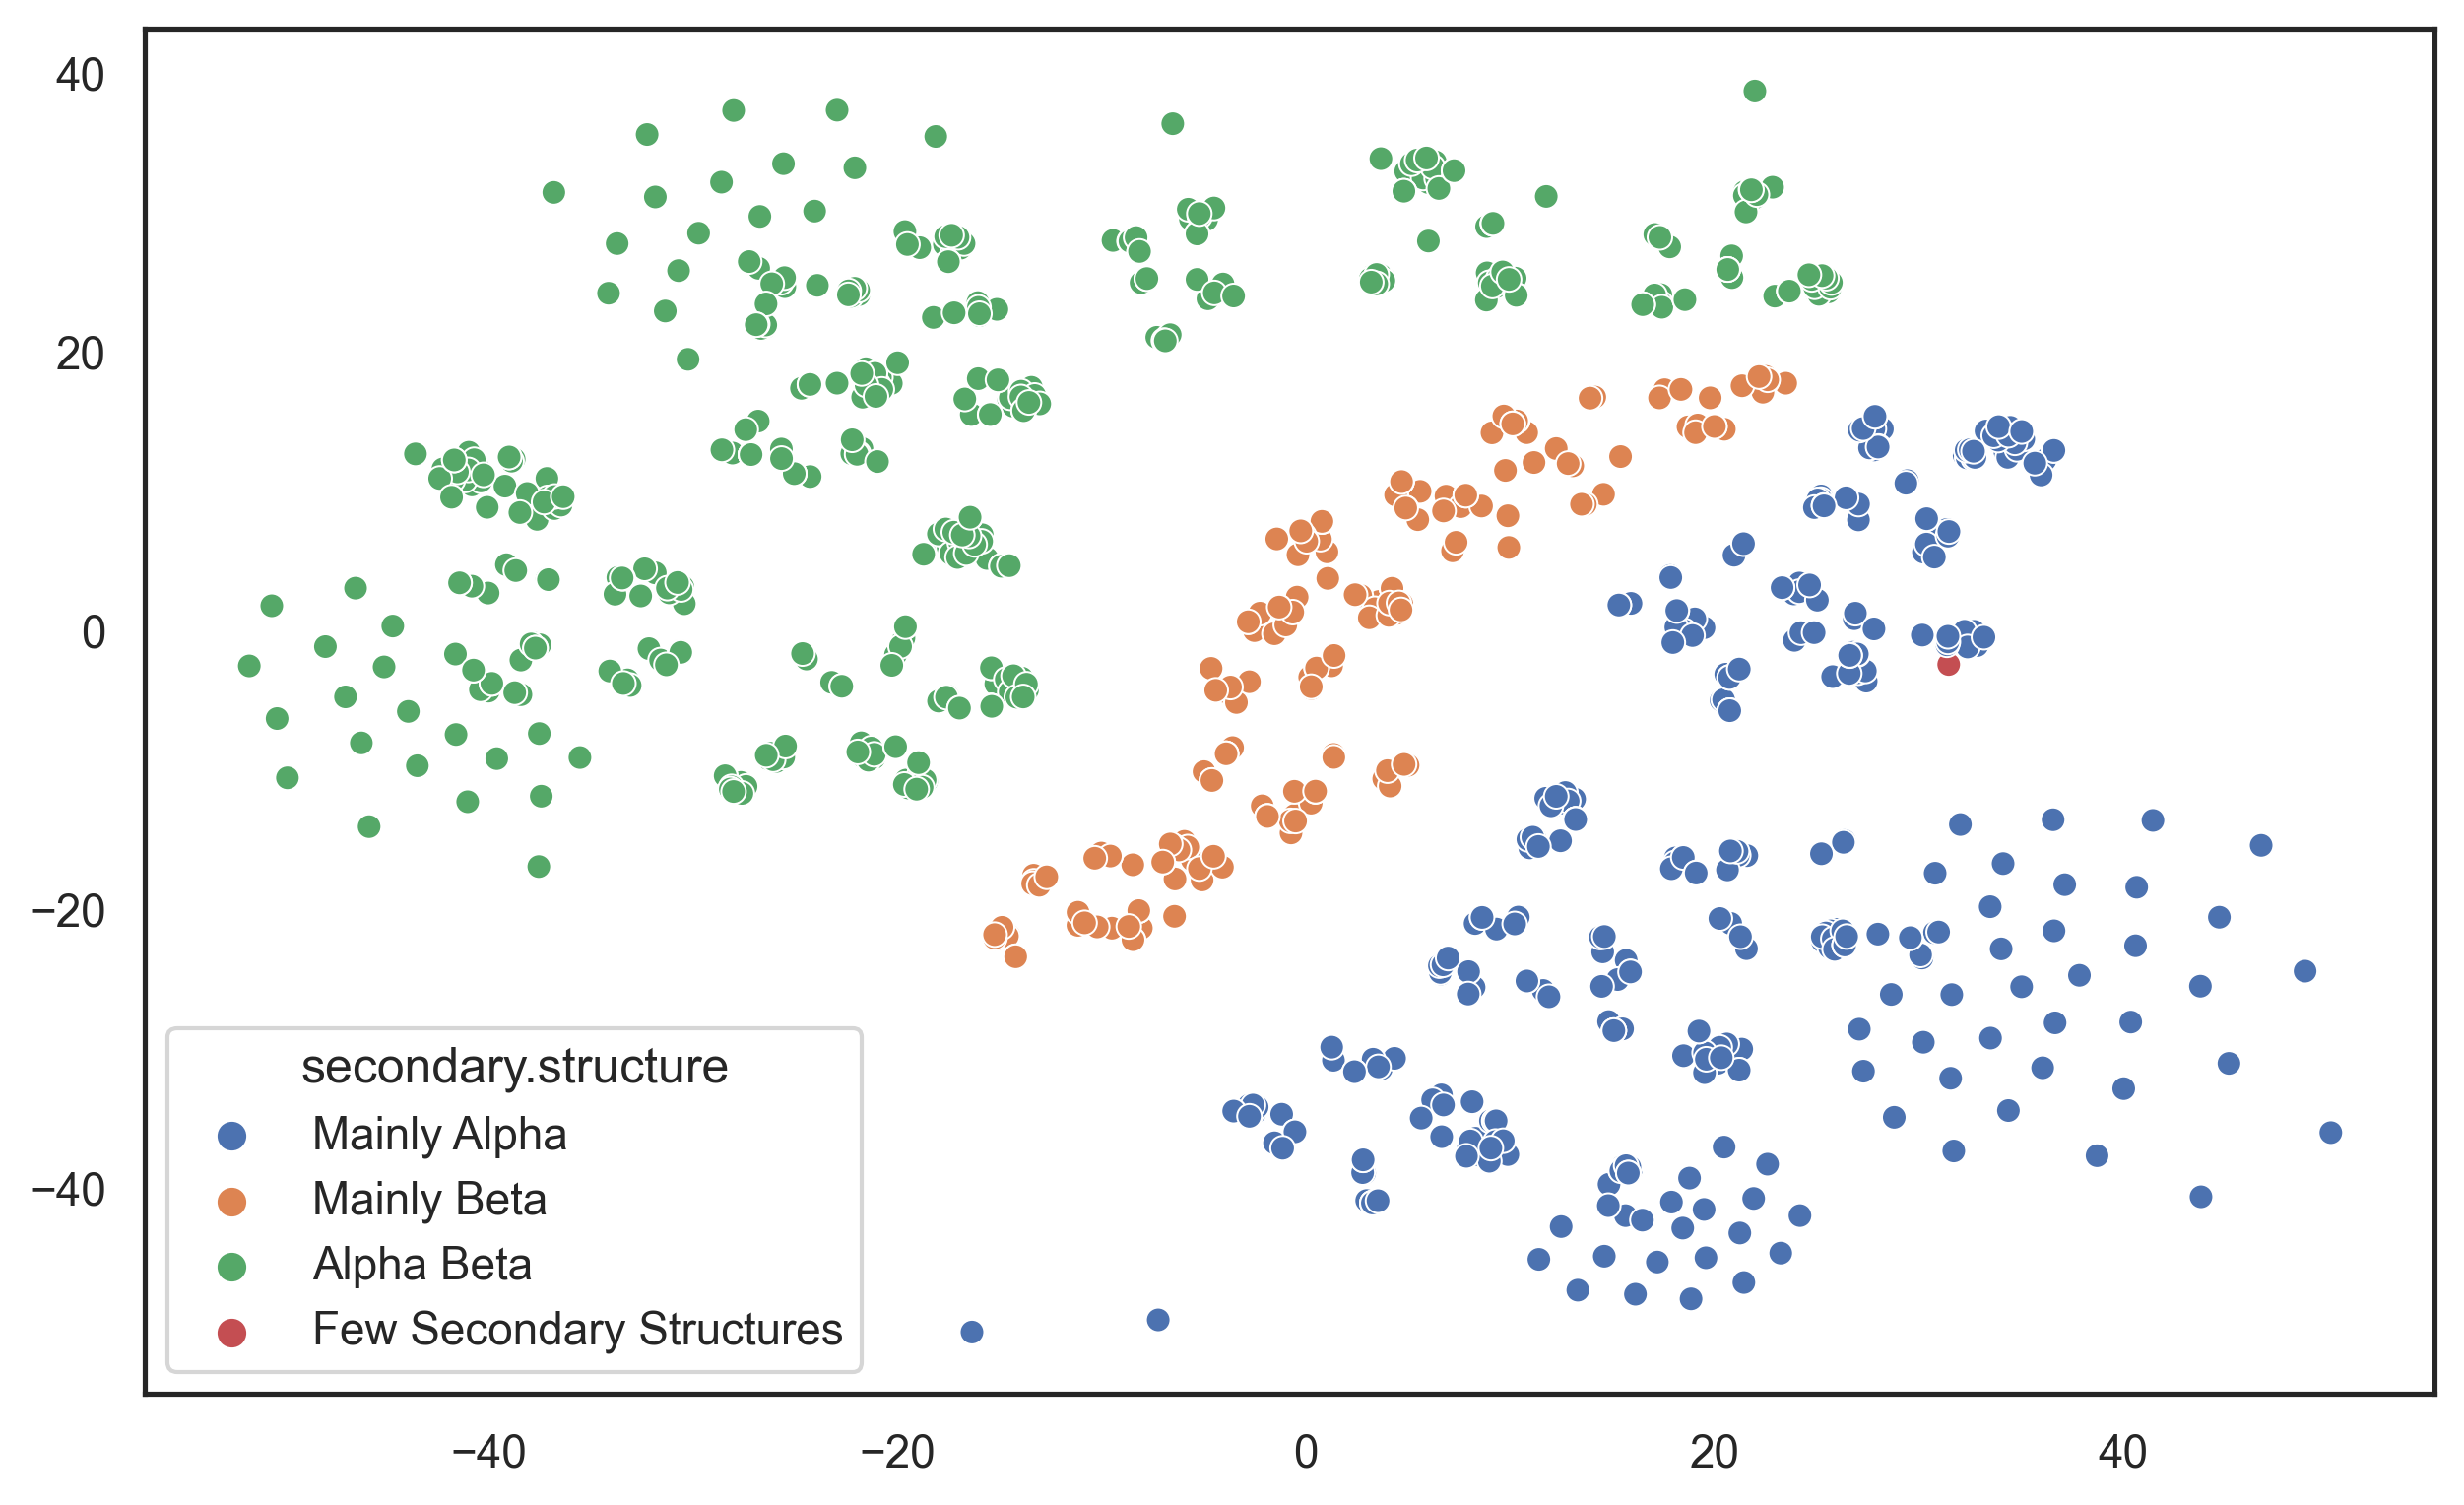

In [54]:
palette = sns.color_palette("bright", 60)
ax = sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=data['secondary.structure'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = None)

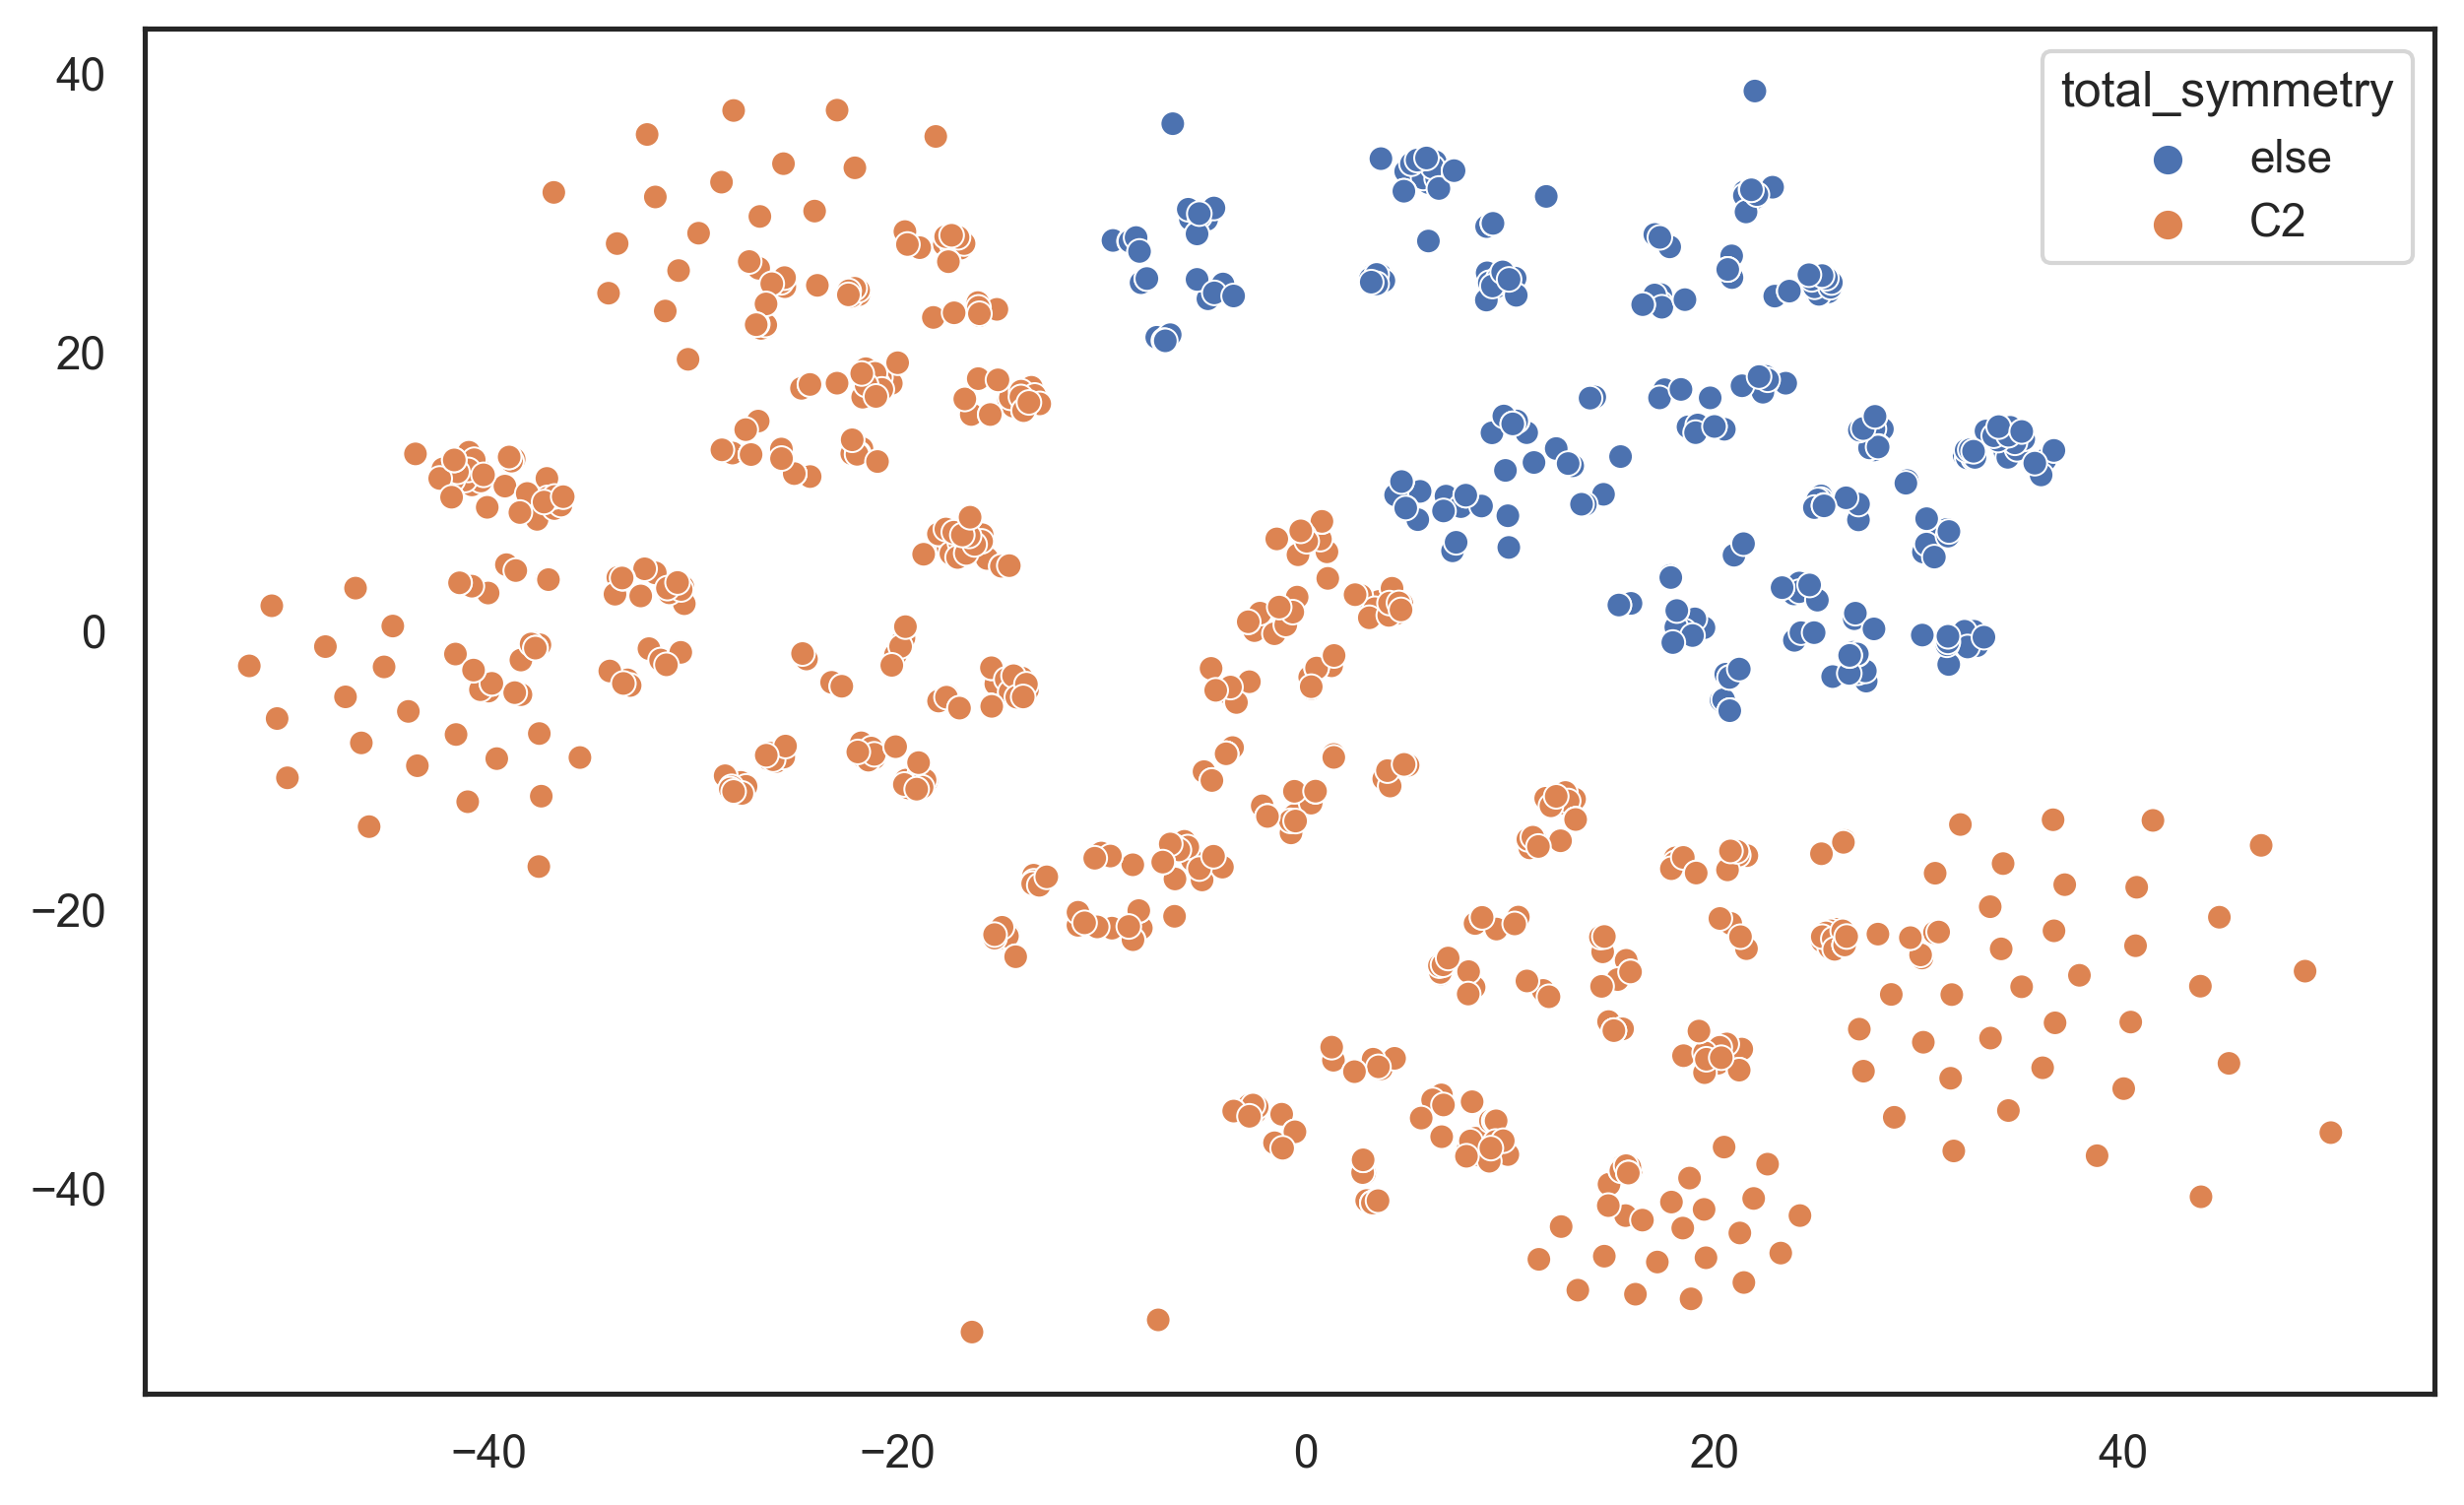

In [55]:
ax = sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=data['total_symmetry'])
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = None)

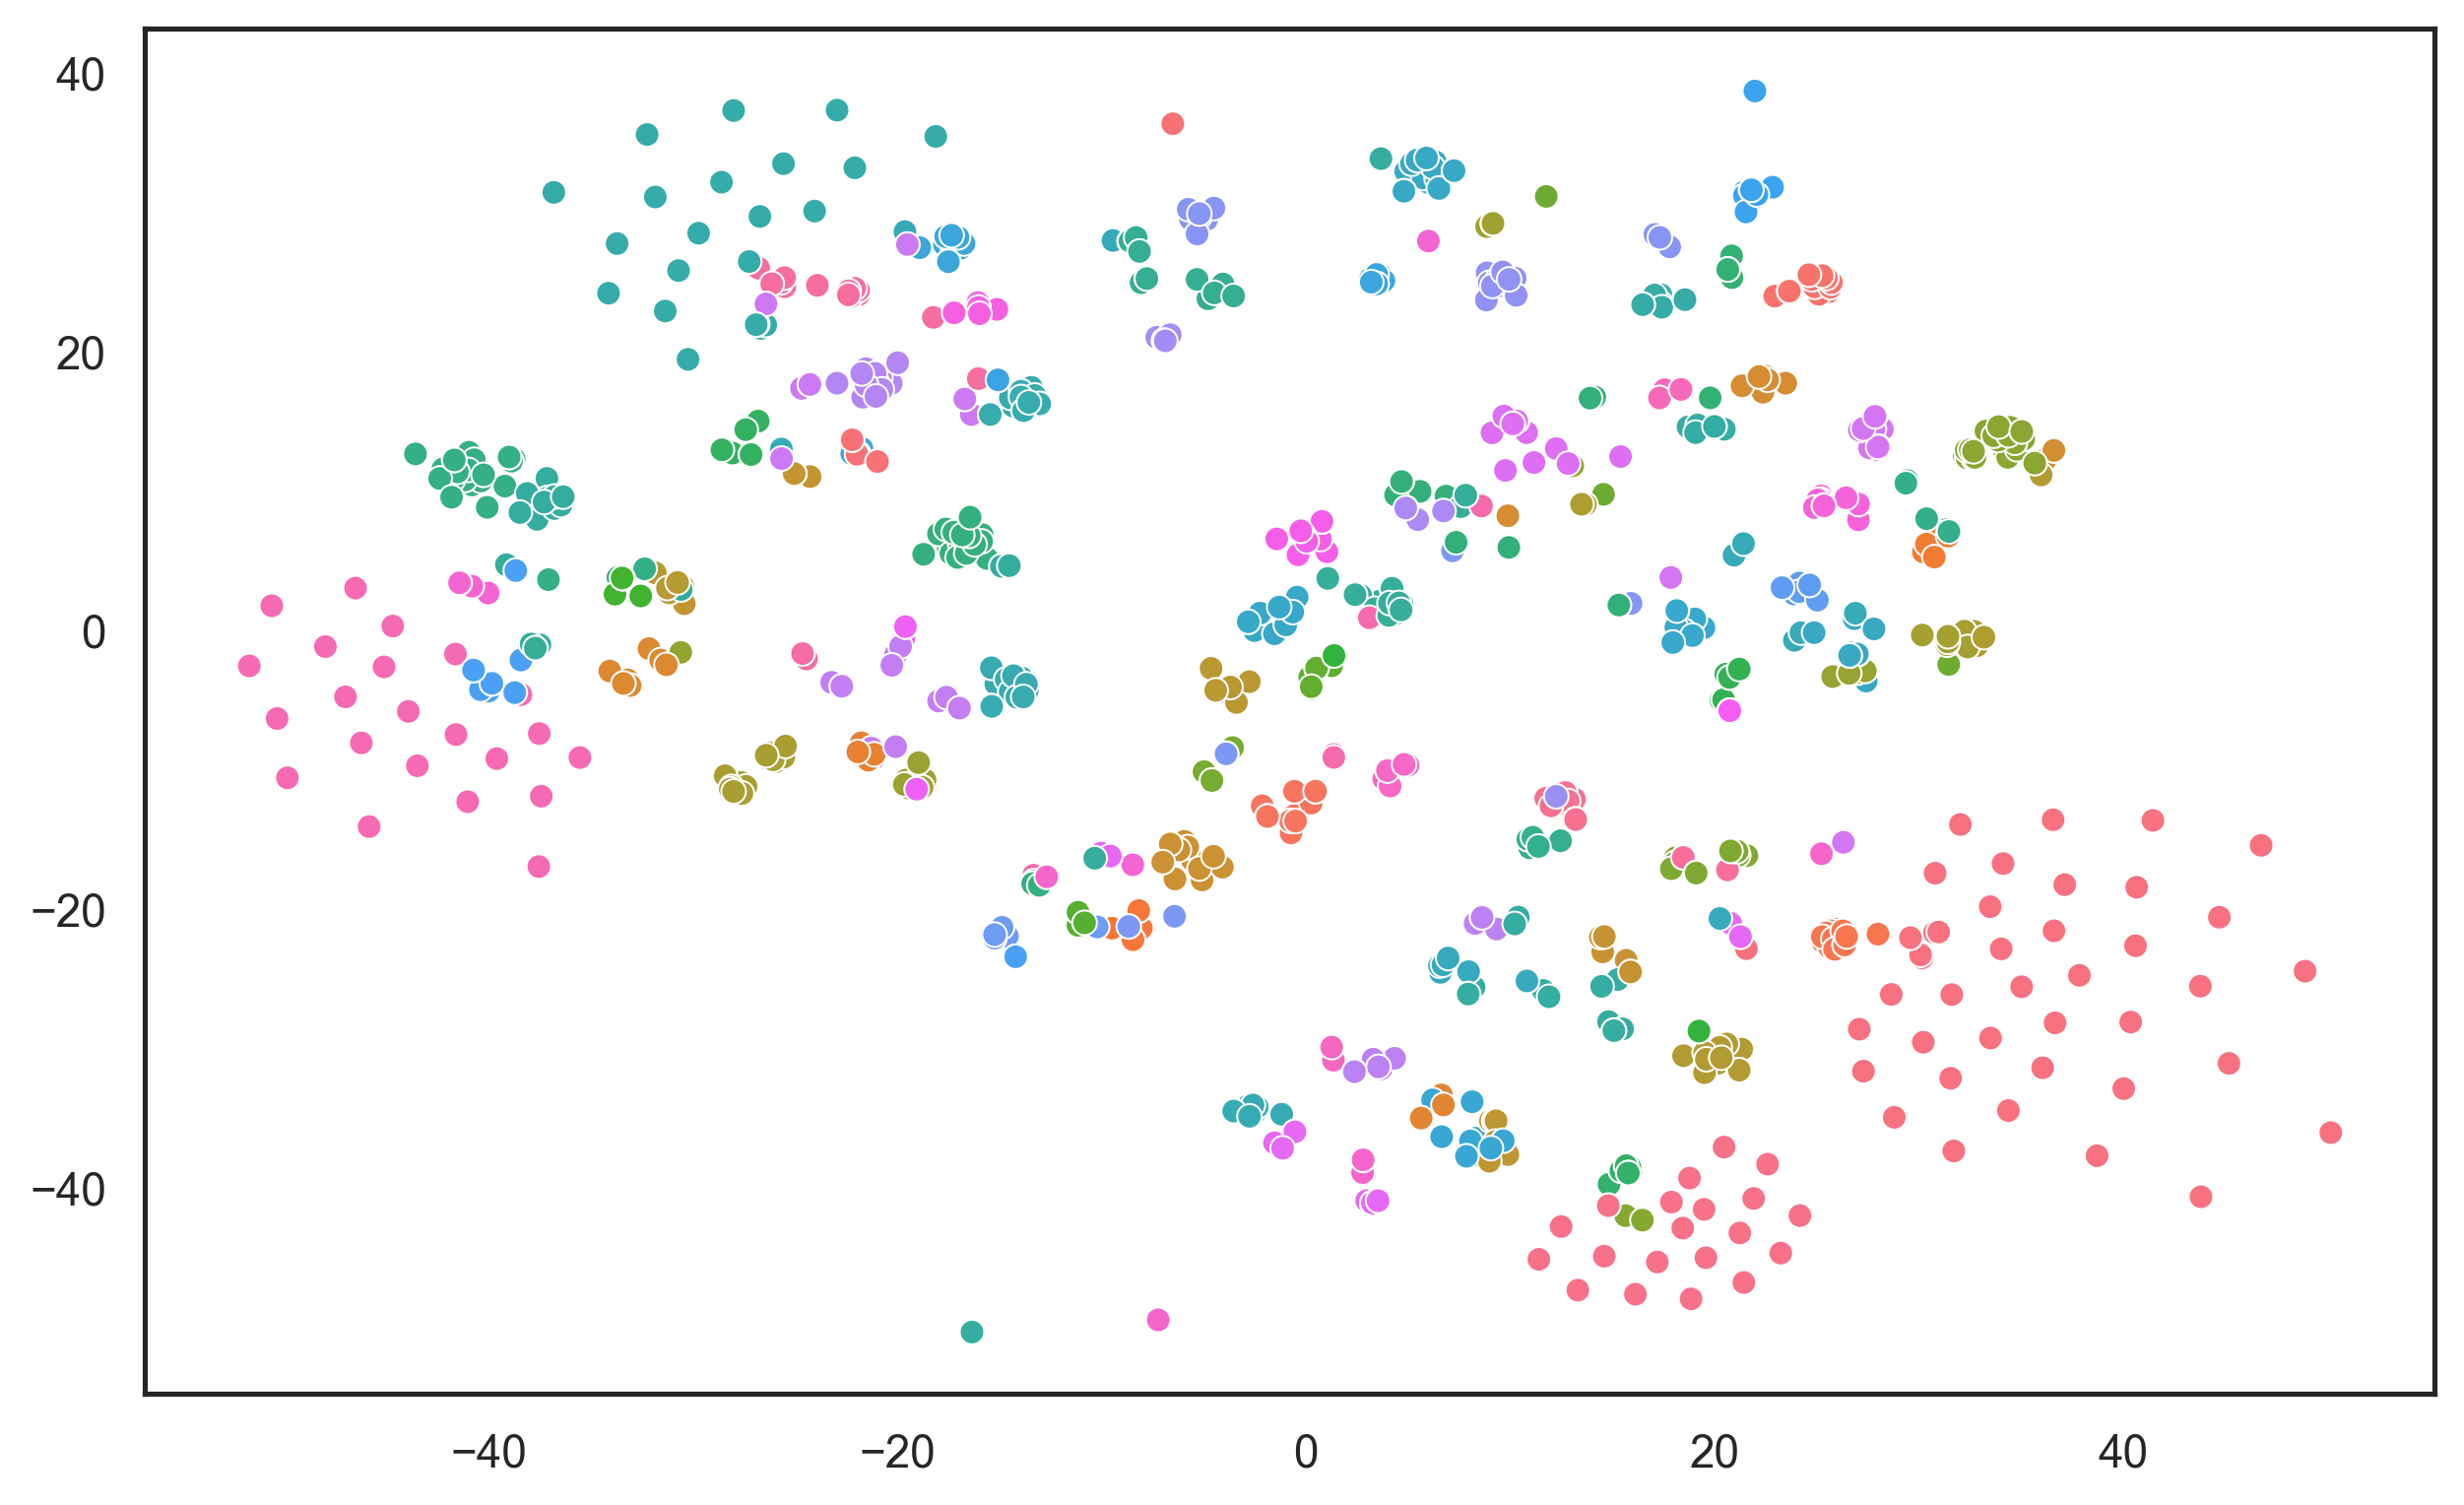

In [56]:
ax = sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=pd.Categorical(data['cluster']), legend = False)